# 演示单通道DAC,ADC和混频器使用
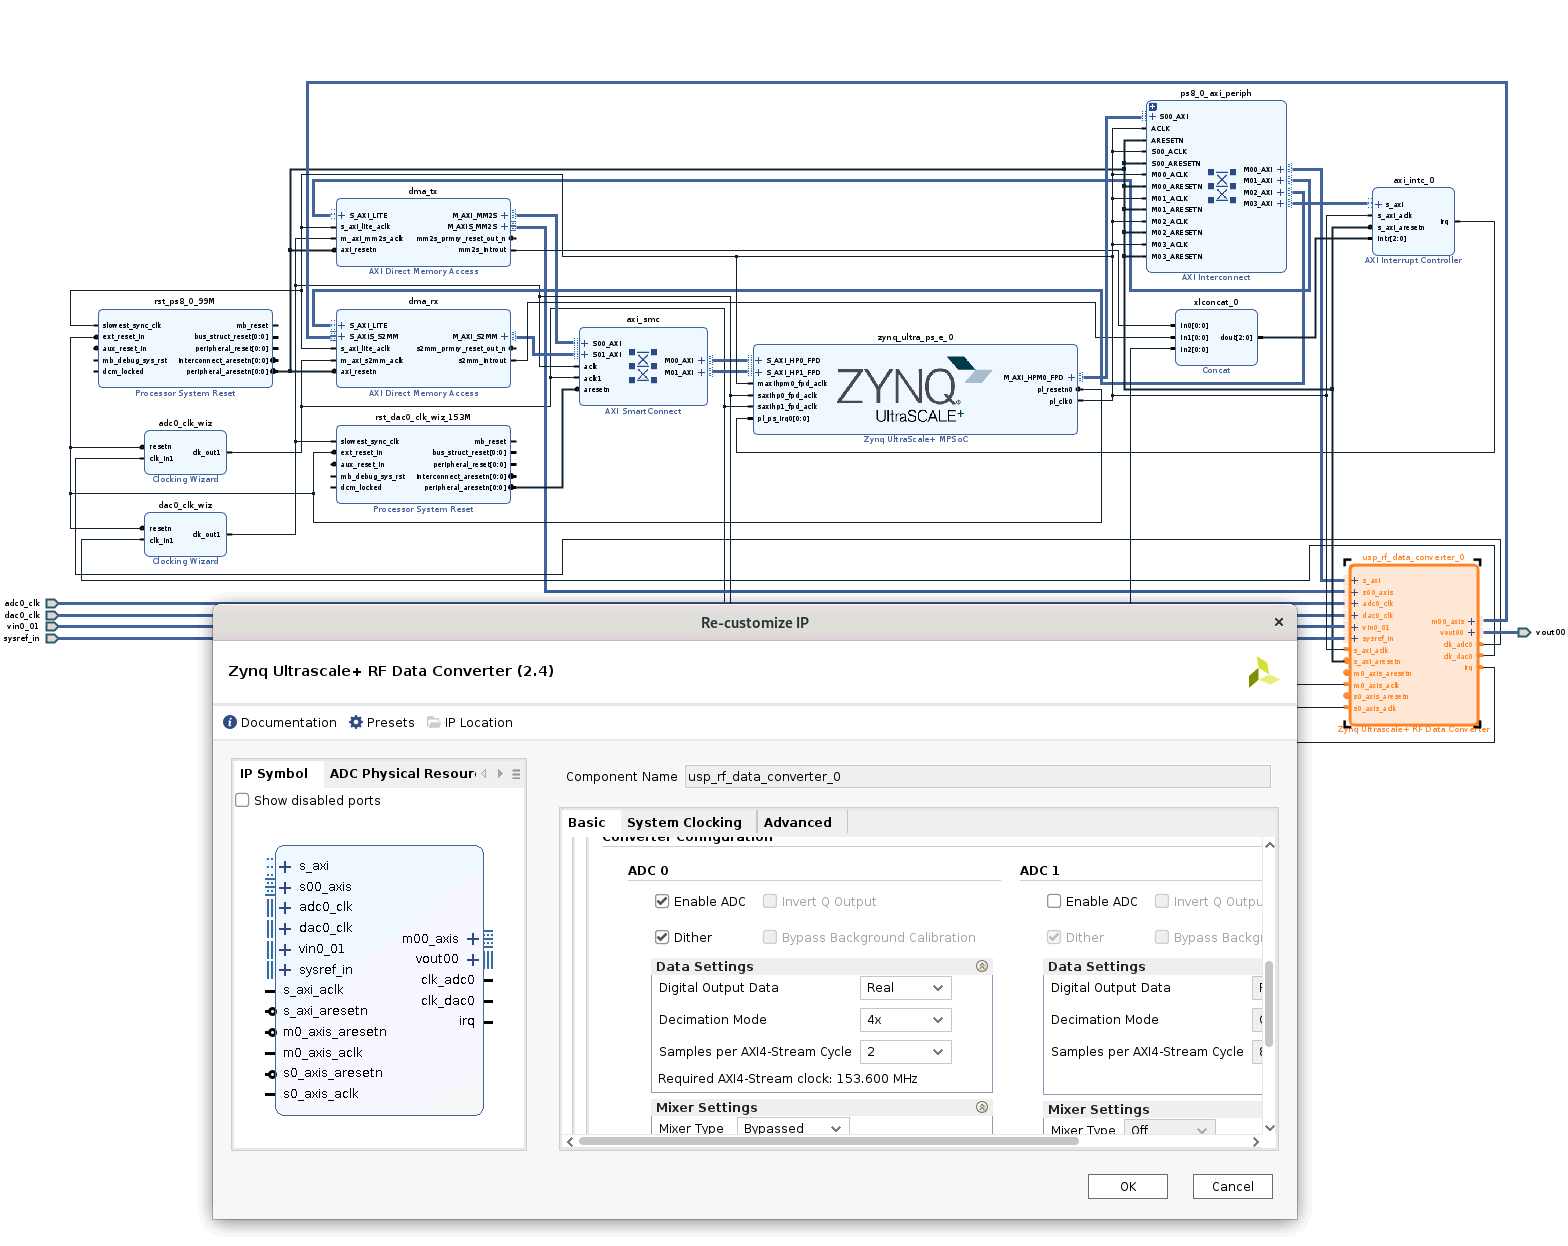


In [1]:
from pynq import allocate
from pynq import Overlay
import numpy as np
import random

import xrfclk
import xrfdc

xrfclk.set_all_ref_clks(409.6)

overlay = Overlay('/home/xilinx/pynq/overlays/single_adc_dac/adc_dac.bit')

In [2]:
#DMA TX
dma_read = overlay.dma_tx

dac_tile = overlay.usp_rf_data_converter_0.dac_tiles[0]
dac_tile.DynamicPLLConfig(1, 409.6, 1228.8)

dac_block = dac_tile.blocks[0]

event = xrfdc.EVNT_SRC_TILE
dac_block.MixerSettings['Freq'] = 900
dac_block.MixerSettings['PhaseOffset'] = 0.0
dac_block.MixerSettings['EventSource'] = event
dac_block.UpdateEvent(event)

dac_tile.SetupFIFO(True)

dac_block.MixerSettings

{'Freq': 900.0,
 'PhaseOffset': 0.0,
 'EventSource': 2,
 'CoarseMixFreq': 16,
 'MixerMode': 4,
 'FineMixerScale': 0,
 'MixerType': 1}

In [3]:
#DMA RX
dma_write = overlay.dma_rx

adc_tile = overlay.usp_rf_data_converter_0.adc_tiles[0]
adc_tile.DynamicPLLConfig(1, 409.6, 1228.8)

adc_block = adc_tile.blocks[0]

event = xrfdc.EVNT_SRC_TILE
adc_block.MixerSettings['Freq'] = 900
adc_block.MixerSettings['PhaseOffset'] = 0.0
adc_block.MixerSettings['EventSource'] = event
adc_block.UpdateEvent(event)

adc_tile.SetupFIFO(True)

adc_block.MixerSettings

{'Freq': 900.0,
 'PhaseOffset': 0.0,
 'EventSource': 2,
 'CoarseMixFreq': 16,
 'MixerMode': 4,
 'FineMixerScale': 0,
 'MixerType': 1}

In [4]:
buffer_length = np.power(2,8)

input_buffer = allocate(shape=(buffer_length,), dtype= np.float64)
output_buffer = allocate(shape=(buffer_length,), dtype= np.float64)

In [8]:
for i in range(buffer_length):
   input_buffer[i] = random.random()*100
input_buffer

PynqBuffer([29.38616758, 76.8391043 , 18.49478929, 37.89112223,
            88.37013038, 59.14230037, 30.14143646, 51.7196408 ,
            84.69389891, 98.03471511, 32.57953727, 42.57357813,
            50.05492412, 21.35273955, 87.93337462, 49.56348078,
            55.90511802, 63.56173907, 19.98382027, 52.93031389,
            37.91501385, 31.99381746, 59.36627873, 74.96645696,
            21.60830274,  0.24178096, 84.21942378, 70.78110764,
            81.06906725, 68.80115209, 31.11351231,  0.82606738,
            95.63078819,  6.13040214, 99.73546192, 54.74684441,
            97.50066091, 30.89884729, 70.83569419, 27.47599496,
             2.81962782, 48.49994806, 16.79465567, 52.90199771,
            29.92289813, 86.52950728, 78.97909752,  3.1280272 ,
            86.75677175, 30.14161361, 46.02846234,  4.91598173,
            84.89266242, 76.44676783, 78.01522334, 60.04628538,
             4.69576757, 18.31145636, 33.29765118, 43.37323321,
             5.47615815, 16.51914116, 44

In [6]:
dma_read.sendchannel.transfer(input_buffer)
dma_write.recvchannel.transfer(output_buffer)
dma_read.sendchannel.wait()
# dma_write.recvchannel.wait()

output_buffer

PynqBuffer([ 0.00000000e+000,  0.00000000e+000,              nan,
                         nan,  6.15384284e-313,              nan,
            -1.68531417e+308,              nan,              nan,
                         nan,  3.05956144e-308,  1.94700965e-308,
                         nan,              nan,              nan,
                         nan,              nan, -1.68533303e+308,
             1.11253268e-308,  4.45019016e-308,              nan,
             1.39063297e-308,  1.39070723e-308,  1.94689082e-308,
            -1.01121439e+308,  1.38992846e-309,  2.22510993e-308,
             1.39077090e-308,              nan,  2.78145055e-308,
            -1.57299349e+308,              nan,  1.39067753e-308,
            -1.34825442e+308,  1.39024676e-309,  1.52968311e-308,
             6.95291018e-309,  3.05945958e-308,  1.52978284e-308,
             2.64227945e-308,  7.42700793e-313, -1.68532360e+308,
             9.73503765e-309, -1.51678472e+308,              nan,
          